# Integration with Python
In many use-cases, an integration of Python with Ruta is desirable. Python can be used for all sort of general-purpose operations (e.g. loading/preprocessing the documents or a statistical evaluation of the results) while Ruta is used for creating/removing annotations.

For this purpose, we use [SoS Notebooks](https://vatlab.github.io/sos-docs/). They are based on the SoS kernel which is a python-based kernel that allows communication with other kernel, e.g. with the IRuta kernel. 

In an SoS Notebook, Python and Ruta code can exist side by side. On the right, you can see a dropdown menu that can be used to select the kernel of each cell.

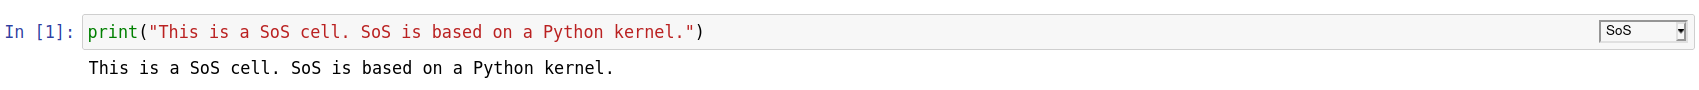

Each kernel has its own workspace. To share variables across workspace, custom magic commands are used. In the following, we will explain how to
   1. Passing content of String variables from Python (SoS Kernel) to IRuta cell using `%expand`
   2. Passing a UIMA CAS object from Python (SoS Kernel) to IRuta kernel using `%cas`
   3. Pass a UIMA CAS from IRuta kernel to Python (SoS Kernel) using `%put`

# 1. Passing content of String variables from Python to Ruta using `%expand`

### Variables in a Python Cell

In [1]:
documentText = '"Patient has fevers, but no chills."'
problem_list = '"fevers|chills|nausea"'
newTypeName  = "Diagnosis"

### Using `%expand`, these values can be transferred to the IRuta kernel.
- Everything in brackets { } is replaced by the values of the python variable (similar to f-strings in Python)
- This allows for passing the document text, wordlists, generated Ruta code and other configuration parameters

In [2]:
%expand
%documentText {documentText}
DECLARE {newTypeName};
{problem_list} -> {newTypeName};
COLOR({newTypeName},"green");

Patient has fevers , but no chills .

##### is identical to

In [3]:
%documentText "Patient has fevers, but no chills."
DECLARE Diagnosis;
"fevers|chills|nausea" -> Diagnosis;
COLOR(Diagnosis,"green");

Patient has fevers , but no chills .

# 2. Passing a UIMA CAS object from Python (SoS Kernel) to IRuta using `%cas`

A Common Analysis Structure (CAS) is an object that contains the document together with all annotations and a TypeSystem. You can read more about it in the [UIMA glossary](https://uima.apache.org/d/uimaj-current/overview_and_setup.html#ugr.glossary).

While UIMA is originally based on Java, the [dkpro-cassis](https://github.com/dkpro/dkpro-cassis) module is used for handling CAS objects in Python.

### Loading the UIMA CAS in Python using dkpro-cassis

In [4]:
import cassis
with open('typesystems/MergedTypeSystem.xml', 'rb') as f:
    typesystem = cassis.load_typesystem(f)   
    
with open("input/xmi/example_en.xmi", "rb") as f:
    cas1 = cassis.load_cas_from_xmi(f, typesystem=typesystem)
print(f"Loaded a document of length {len(cas1.sofa_string)} characters with {len(cas1.select('de.averbis.textanalysis.types.health.Drug'))} drug mentionings.")

Loaded a document of length 1510 characters with 3 drug mentionings.


### Loading it into IRuta kernel with line magic `%get`, highlight all "Drug" mentionings

In [5]:
%get cas1
%displayMode RUTA_COLORING
COLOR(Drug,"lightgreen");

ANAMNESIS Symptoms in the sense of restless legs syndrome were noted in the legs with tingling paresthesias. This had occurred especially with the intake of Isoptin . Blood pressure was now well controlled. The nocturnal CPAP therapy has helped. Occasionally, angina pectoris with left precordial pressure occurs regardless of exertion, although it is weather-dependent. No dizziness, occasional subjective heart palpitations. EXAMINATION FINDINGS Blood pressure normotensive at the time of examination, regular heartbeat sequence, no pathological auscultation findings over the heart. Pure 1st and 2nd heart sounds. Vesicular breathing on both sides. Supraaortic conduction vessels are clear. At the time of examination, discrete leg edema bilaterally, foot pulses palpable laterally with some limitation. LABOR: No significant pathological abnormalities, especially very good adjustment of total cholesterol. ECG Heart rate 63/min, sinus rhythm, indifferent type, T-flattening in aVL. Incomplete RSB. DIAGNOSIS Coronary artery disease, arterial hypertension. THERAPY From the cardiac side, there is a pleasing constancy of findings. With regard to the leg symptoms, the arteries and veins were unremarkable, so that an attempt to stop Isoptin was discussed. In case of borderline elevated pulmonary pressure, oxygen insufflation during the night is not necessary in addition to CPAP therapy. We request consultation and re-presentation in 14 days. Increase medication from DILATREND 12 . 5 mg to 1-0-1.

#### Remove all drug mentionings.

In [6]:
d:Drug{-> UNMARK(d)};

ANAMNESIS Symptoms in the sense of restless legs syndrome were noted in the legs with tingling paresthesias. This had occurred especially with the intake of Isoptin. Blood pressure was now well controlled. The nocturnal CPAP therapy has helped. Occasionally, angina pectoris with left precordial pressure occurs regardless of exertion, although it is weather-dependent. No dizziness, occasional subjective heart palpitations. EXAMINATION FINDINGS Blood pressure normotensive at the time of examination, regular heartbeat sequence, no pathological auscultation findings over the heart. Pure 1st and 2nd heart sounds. Vesicular breathing on both sides. Supraaortic conduction vessels are clear. At the time of examination, discrete leg edema bilaterally, foot pulses palpable laterally with some limitation. LABOR: No significant pathological abnormalities, especially very good adjustment of total cholesterol. ECG Heart rate 63/min, sinus rhythm, indifferent type, T-flattening in aVL. Incomplete RSB. DIAGNOSIS Coronary artery disease, arterial hypertension. THERAPY From the cardiac side, there is a pleasing constancy of findings. With regard to the leg symptoms, the arteries and veins were unremarkable, so that an attempt to stop Isoptin was discussed. In case of borderline elevated pulmonary pressure, oxygen insufflation during the night is not necessary in addition to CPAP therapy. We request consultation and re-presentation in 14 days. Increase medication from DILATREND 12.5 mg to 1-0-1.

# 3. Pass a CAS from IRuta kernel to Python (SoS Kernel) using `%put`
`%put modified_cas` => Saves current CAS into the SoS-kernel (Python) variable with name `modified_cas`

In [7]:
%put modified_cas

In [8]:
print(f"The document has {len(modified_cas.sofa_string)} characters with {len(modified_cas.select('de.averbis.textanalysis.types.health.Drug'))} drug mentionings.")

The document has 1510 characters with 0 drug mentionings.
